This notebook plots ROIs from minian along with max and min projections to aid in tracking neurons across days and eventually cross-registering.  Much of this will be built into TraceFC and/or NeuroPy modules, but the backbone is here for easy visualiation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os
import xarray as xr

if os.environ['SHELL'] == '/bin/zsh':
    sys.path.append('/Users/nkinsky/Documents/UM/GitHub/TraceFC/')
    sys.path.append('/Users/nkinsky/Documents/UM/GitHub/NeuroPy/')
elif os.environ['SHELL'] in ['/bin/bash', '/bin/sh']:
    sys.path.append('/data/GitHub/TraceFC/')
    sys.path.append('/data/GitHub/NeuroPy/')
%load_ext autoreload
%autoreload 2

from neuropy.plotting.ca_events import plot_pe_traces
from neuropy.io.minianio import MinianIO
from neuropy.core.ca_neurons import CaNeuronReg, CaNeurons

# Put any user-defined functions for grabbing recording folder locations here
try:
    use_sd = True
    import session_directory as sd
except ModuleNotFoundError:
    use_sd = False
    print('No session_directory module found - enter recording folders by hand below')

## NRK todo:
Make below into a function that will work outside of TraceFC. Base function will plot ROIs on top of max proj. Another will plot min_proj. A third will combine them. Then you can loop through and plot for any set of sessions (all functions before now will go into NeuroPy) by either inputting a session directory OR using a lambda function to grab the sesh_dir from the animal name and session!  This last function could be implemented in TraceFC.

In [2]:
# list either session alias here if using session_directory or full path to recording folders
session_list = ['Habituation2', 'Training', 'Recall1']
animal = 'Jyn'

dir_use = session_list if not use_sd else lambda session: sd.get_session_dir(animal, session)

In [3]:
# define any user-specific or animal-specific trimming of minian neurons
animal = 'Jyn'
if animal != 'Rat698':
    sessions = ['Habituation1', 'Habituation2', 'Training', 'Recall1', 'Recall2', 'Recall7']
else:
    sessions = ['Habituation1', 'Habituation2', 'Training', 'Recall1', 'Recall7']

nsessions = len(sessions)
if animal != 'Finn':
    keep = [['good', 'maybe_interneurons']]*nsessions
    trim = [False]*nsessions
elif animal == 'Finn':
    trim = [None, None, 'bad_units', None, None, None]
    keep = [['good', 'maybe_interneurons'], ['good', 'maybe_interneurons'], None, ['good', 'maybe_interneurons'], 
            ['good', 'maybe_interneurons'], ['good', 'maybe_interneurons']]

Keeping 39107 good frames found in "good_frames_bool.npy" file
Keeping 38282 good frames found in "good_frames_bool.npy" file
Eliminating timestamps from corrupted video10 in 12_46_16 folder.
Keeping 152933 good frames found in "good_frames_bool.npy" file
Keeping 47329 good frames found in "good_frames_bool.npy" file
Keeping 52453 good frames found in "good_frames_bool.npy" file
Keeping 43537 good frames found in "good_frames_bool.npy" file


(<Figure size 3402x1260 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'Habituation1'}>,
         <AxesSubplot:title={'center':'Habituation2'}>,
         <AxesSubplot:title={'center':'Training'}>,
         <AxesSubplot:title={'center':'Recall1'}>,
         <AxesSubplot:title={'center':'Recall2'}>,
         <AxesSubplot:title={'center':'Recall7'}>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

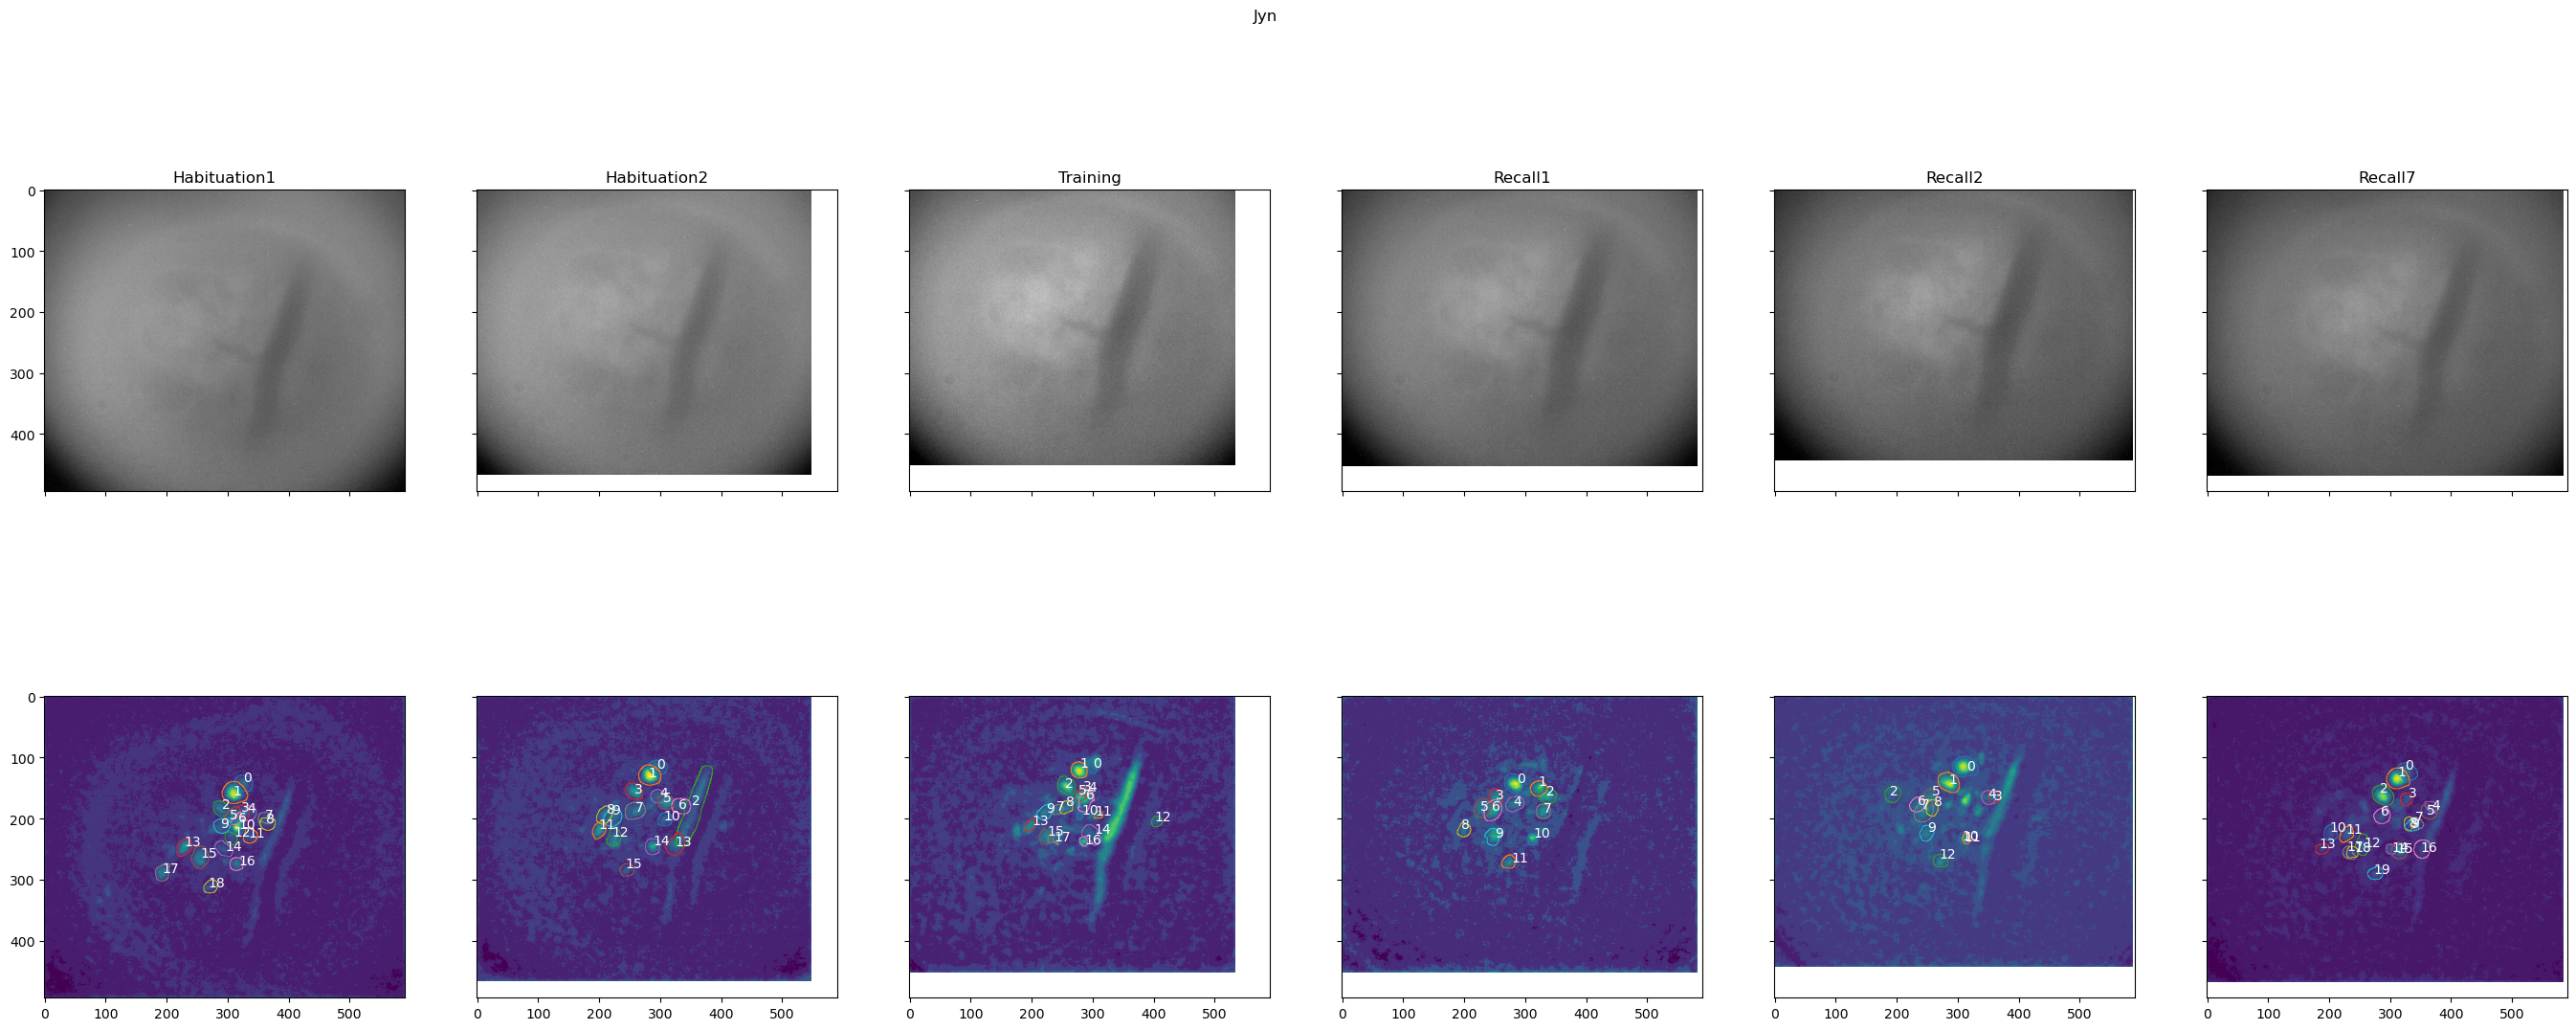

In [4]:
%matplotlib notebook
# Now run through and plot ROIs for each session    
caneurons = [MinianIO(basedir=dir_use(session)).trim_neurons(keep=kp, trim=tm) 
             for session, kp, tm in zip(sessions, keep, trim)]

FinnReg = CaNeuronReg(caneurons, alias=sessions)
FinnReg.plot_rois_across_sessions(fig_title=animal, min_type="mc_min_crop")

<IPython.core.display.Javascript object>


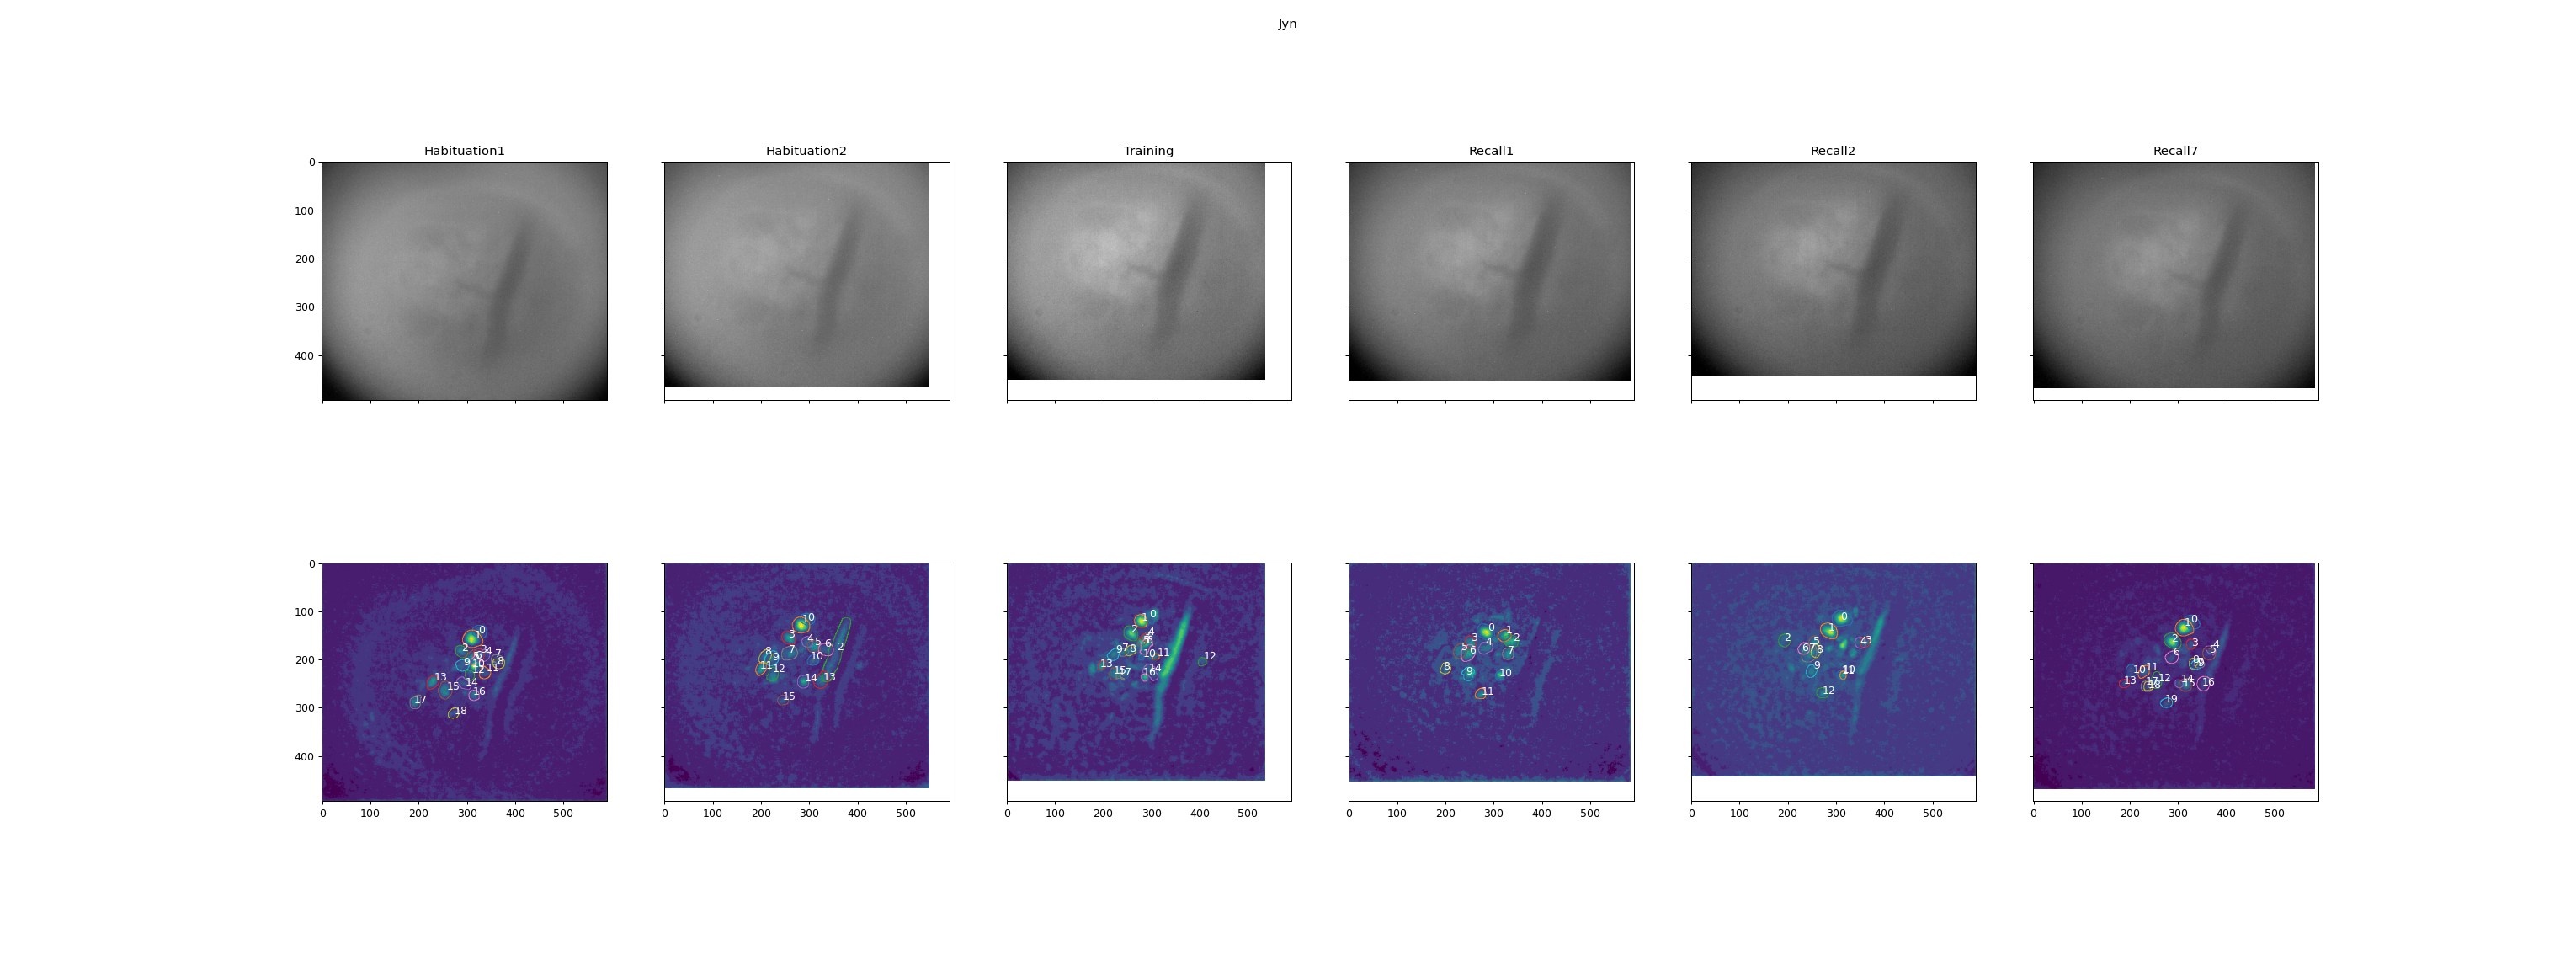

(<Figure size 3402x1260 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'Habituation1'}>,
         <AxesSubplot:title={'center':'Habituation2'}>,
         <AxesSubplot:title={'center':'Training'}>,
         <AxesSubplot:title={'center':'Recall1'}>,
         <AxesSubplot:title={'center':'Recall2'}>,
         <AxesSubplot:title={'center':'Recall7'}>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [5]:
%matplotlib notebook
FinnReg.plot_rois_across_sessions(fig_title=animal, min_type="mc_min_crop")

In [8]:
fig = plt.gcf()
fig.savefig('/data/Finn_rois_across_days.pdf')

## The code below will fix a YrA variable with the wrong number of units

In [40]:
from neuropy.io.minianio import fix_dim_mismatch

sesh_dir = sd.get_session_dir('Jyn', 'Habituation2')
minian = MinianIO(basedir=sesh_dir)
print(minian.YrA.shape)
print(minian.S.shape)

fix_dim_mismatch(sesh_dir / 'Miniscope_combined' / 'minian' / 'YrA.zarr', 
                sesh_dir / 'Miniscope_combined' / 'minian' / 'S.zarr', 'unit_id')


Keeping 38282 good frames found in "good_frames_bool.npy" file
(21, 38282)
(18, 38282)


Run this to check everything matches up and if it does delete the YrA.zarr variable and rename YrA_fixed.zarr to YrA.zarr

In [43]:
sesh_dir = sd.get_session_dir('Jyn', 'Habituation2')
minian = MinianIO(basedir=sesh_dir)
print(minian.YrA.shape)
print(minian.S.shape)
xr.open_zarr(sesh_dir / 'Miniscope_combined' / 'minian' / 'YrA_fixed.zarr')

Keeping 38282 good frames found in "good_frames_bool.npy" file
(18, 38282)
(18, 38282)


<xarray.Dataset>
Dimensions:  (frame: 38282, unit_id: 18)
Coordinates:
    animal   <U3 ...
  * frame    (frame) int64 4 5 6 7 8 9 ... 38290 38291 38292 38293 38294 38295
    session  <U23 ...
  * unit_id  (unit_id) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables:
    YrA      (unit_id, frame) float64 dask.array<chunksize=(1, 38282), meta=np.ndarray>